In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Pre-processing

In [ ]:
 !pip install -qq -U mlxtend

     |████████████████████████████████| 1.3 MB 3.9 MB/s 


In [ ]:
import pandas as pd
import numpy
from numpy.random import randint
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.frequent_patterns import association_rules
import nltk
from nltk.tokenize import word_tokenize
import re
from nltk.stem import PorterStemmer
from tqdm.auto import tqdm
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from networkx.algorithms.flow import shortest_augmenting_path
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
PORTER_STEMMER = PorterStemmer()

In [ ]:
def clean_tweets(x, STOPWORDS):
    # Lowercase
    sentence = x.lower()
    
    # Remove all non-alphabets (punctuation, numbers, new-line characters and extra-spaces)
    sentence = re.sub('http[s]?://\S+', '', sentence)
    sentence = re.sub(r'([^a-zA-Z ]+?)', '', sentence)
    #print(sentence)
    #sentence = sentence.replace('\n', '')
    # Remove URLs
    sentence = sentence.replace("world health organization", "who")
    #print(sentence)
    # Remove double spacing
    #sentence = re.sub('\s+', ' ', sentence)
    tokenized_tweet = [word for word in word_tokenize(sentence) if word not in STOPWORDS]
    tokenized_tweet = [PORTER_STEMMER.stem(word) for word in tokenized_tweet]
    return tokenized_tweet

<>:6: DeprecationWarning: invalid escape sequence \S
<>:6: DeprecationWarning: invalid escape sequence \S
<>:6: DeprecationWarning: invalid escape sequence \S
<ipython-input-5-e9114ee358bb>:6: DeprecationWarning: invalid escape sequence \S
  sentence = re.sub('http[s]?://\S+', '', sentence)


In [ ]:
pharma_username = ['pfizer']
#'JNJNews', 'AstraZeneca', 'GSK', 'Novartis'
public_username = ['CDCgov', 'IHSgov', 'GovCanHealth', 'GCIndigenous']
ngo_username = ['WHO']

In [ ]:
file1 = '/content/drive/MyDrive/Project 2/data/public_health_agencies/'+'CDCgov'+'.csv'
file2 = '/content/drive/MyDrive/Project 2/data/public_health_agencies/'+'IHSgov'+'.csv'
file3 = '/content/drive/MyDrive/Project 2/data/public_health_agencies/'+'GovCanHealth'+'.csv'
file4 = '/content/drive/MyDrive/Project 2/data/public_health_agencies/'+'GCIndigenous'+'.csv'
Sample_Tweets = pd.concat(
map(pd.read_csv, [file1, file2, file3, file4]), ignore_index=True)
print(Sample_Tweets)
# dataFrame.to_csv('/content/drive/MyDrive/Project 2/gephi/public_health_agencies/public_merged.csv')

                        id                 created_at      conversation_id  \
0      1542616744874967040  2022-06-30 21:11:07+00:00  1542616744874967040   
1      1542616268678758400  2022-06-30 21:09:13+00:00  1542616268678758400   
2      1542606417621913607  2022-06-30 20:30:04+00:00  1542606417621913607   
3      1542590047656067073  2022-06-30 19:25:01+00:00  1542590047656067073   
4      1542574696532787200  2022-06-30 18:24:01+00:00  1542574696532787200   
...                    ...                        ...                  ...   
65558  1215291794616999936  2020-01-09 15:18:37+00:00  1215291794616999936   
65559  1214286619458584577  2020-01-06 20:44:25+00:00  1214286619458584577   
65560  1213811169435291648  2020-01-05 13:15:08+00:00  1213811169435291648   
65561  1213086419318644736  2020-01-03 13:15:15+00:00  1213086419318644736   
65562  1212398550774165506  2020-01-01 15:41:54+00:00  1212398550774165506   

                                                   tweet  retwe

In [ ]:
Sample_Tweets = Sample_Tweets.sample(n=10)

In [ ]:
Sample_Tweets.iloc[0]

id                                                   1542616744874967040
created_at                                     2022-06-30 21:11:07+00:00
conversation_id                                      1542616744874967040
tweet                  Children receive smaller doses of the #COVID19...
retweet_count                                                          1
like_count                                                             7
reply_count                                                           15
quote_count                                                            0
expanded_url           https://twitter.com/CDCgov/status/154261674487...
language                                                              en
possibly_sensitive                                                 False
in_reply_to_user_id                                                  NaN
username                                                          CDCgov
Name: 0, dtype: object

In [ ]:
stopwords_df = set(nltk.corpus.stopwords.words("english"));
# stopwords_df.add("rt")
# stopwords_df.add("amp")
# stopwords_df.add("get")
# stopwords_df.add("It")
print(stopwords_df)

{'been', 'all', 'itself', 'these', 'by', 'into', 'to', "wasn't", 'when', 'they', 'themselves', 'y', 'over', "you're", 'this', 'for', "hasn't", 'those', 'being', 'up', 'will', 'o', 'at', 'wasn', "you've", 'such', 'are', 'how', 'or', 'of', 'no', 'now', 'we', 'before', 'me', 'if', 'won', "didn't", 'myself', 'some', 'needn', 'on', 'the', 'her', "it's", 'which', 'own', 'any', 'through', 'only', 'did', 'yourself', 'he', 'that', 'does', 'his', 'below', 's', 'out', 'most', 'then', 'weren', 'in', 'isn', 'ain', "wouldn't", 'll', 'should', 'herself', 'couldn', 'ma', "don't", 'shan', 'during', 'theirs', 'doesn', 'but', 'who', 'both', 'same', 'between', 'their', "hadn't", "mustn't", 'and', 'mightn', 'until', 'don', "mightn't", 'further', 'd', 'each', 'where', "won't", 'himself', 'be', "shan't", 'once', 'hadn', 'our', 'ourselves', 'nor', "couldn't", 'she', 'hers', 'not', 'than', 'haven', "isn't", 'him', 'here', "aren't", "that'll", "you'd", "weren't", 'yours', 'were', 'it', 'had', 'aren', 'mustn', '

#Word Cloud

In [ ]:
df = None
Tweet_Texts=Sample_Tweets['tweet'].values

# Converting the text column as a single string for wordcloud
Tweets_String=str(Tweet_Texts)

# Tweet Text cleaning
import re

# Converting the whole text to lowercase
Tweet_Texts_Cleaned = Tweets_String.lower()

# Removing the twitter usernames from tweet string
Tweet_Texts_Cleaned=re.sub(r'@\w+', ' ', Tweet_Texts_Cleaned)

# Removing the URLS from the tweet string
Tweet_Texts_Cleaned=re.sub(r'http\S+', ' ', Tweet_Texts_Cleaned)


# Deleting everything which is not characters
Tweet_Texts_Cleaned = re.sub(r'[^a-z A-Z]', ' ',Tweet_Texts_Cleaned)

# Deleting any word which is less than 3-characters mostly those are stopwords
Tweet_Texts_Cleaned= re.sub(r'\b\w{1,2}\b', '', Tweet_Texts_Cleaned)

# Stripping extra spaces in the text
Tweet_Texts_Cleaned= re.sub(r' +', ' ', Tweet_Texts_Cleaned)

Tweet_Texts_Cleaned
# for username in pharma_username:

  # Sample_Tweets = pd.read_csv('/content/drive/MyDrive/Project 2/data/pharma_companies/'+username+'.csv')

  #only 10 rows
  # Sample_Tweets = Sample_Tweets[:10]
  
  #clean tweets
  # Extracting only the Tweet text from the data frame
  # Tweet_Texts=Sample_Tweets['tweet'].values

  # # Converting the text column as a single string for wordcloud
  # Tweets_String=str(Tweet_Texts)

  # # Tweet Text cleaning
  # import re

  # # Converting the whole text to lowercase
  # Tweet_Texts_Cleaned = Tweets_String.lower()

  # # Removing the twitter usernames from tweet string
  # Tweet_Texts_Cleaned=re.sub(r'@\w+', ' ', Tweet_Texts_Cleaned)

  # # Removing the URLS from the tweet string
  # Tweet_Texts_Cleaned=re.sub(r'http\S+', ' ', Tweet_Texts_Cleaned)


  # # Deleting everything which is not characters
  # Tweet_Texts_Cleaned = re.sub(r'[^a-z A-Z]', ' ',Tweet_Texts_Cleaned)

  # # Deleting any word which is less than 3-characters mostly those are stopwords
  # Tweet_Texts_Cleaned= re.sub(r'\b\w{1,2}\b', '', Tweet_Texts_Cleaned)

  # # Stripping extra spaces in the text
  # Tweet_Texts_Cleaned= re.sub(r' +', ' ', Tweet_Texts_Cleaned)

  # Tweet_Texts_Cleaned

' children receive smaller doses the covid vaccine based their age like the adult vaccine the children vaccine helps keep them from getting seriously sick children and teens may get covid vaccines and other vaccines the same time you have questions talk your healthcare provider june million people have received least one dose covid vaccine those million are fully vaccinated more than million people have received covid booster dose nfind covid vaccine booster near you jordansprinciple can help firstnations children who need educational products services supports such teaching educational assistants find out more learn more about jordansprinciple announce the coming into force bill act respecting first nations inuit and tis children youth and famil '

In [ ]:
print(Tweet_Texts_Cleaned)

 children receive smaller doses the covid vaccine based their age like the adult vaccine the children vaccine helps keep them from getting seriously sick children and teens may get covid vaccines and other vaccines the same time you have questions talk your healthcare provider june million people have received least one dose covid vaccine those million are fully vaccinated more than million people have received covid booster dose nfind covid vaccine booster near you jordansprinciple can help firstnations children who need educational products services supports such teaching educational assistants find out more learn more about jordansprinciple announce the coming into force bill act respecting first nations inuit and tis children youth and famil 


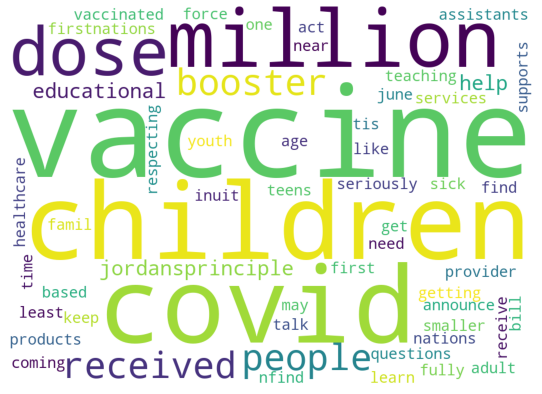

In [ ]:
# Plotting the wordcloud 
# you can specify fonts, stopwords, background color and other options
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Creating the custom stopwords
customStopwords=list(stopwords_df)

wordcloudimage = WordCloud(
                          max_words=100,
                          max_font_size=500,
                          font_step=2,
                          stopwords=customStopwords,
                          background_color='white',
                          width=1000,
                          height=720
                          ).generate(Tweet_Texts_Cleaned)

plt.figure(figsize=(15,7))
plt.axis("off")
plt.imshow(wordcloudimage)
wordcloudimage
plt.show()

#ARM (Itemsets)

In [ ]:
len(file1)

71

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
df = Sample_Tweets
  
#clean tweets
tqdm.pandas()
df["tokenized_tweet"] = df["tweet"].progress_apply(lambda x : clean_tweets(x, stopwords_df))
tokenized_tweets = df["tokenized_tweet"].values.tolist()
te = TransactionEncoder()
te_ary = te.fit(tokenized_tweets).transform(tokenized_tweets)
df = pd.DataFrame(te_ary, columns=te.columns_)


  

  0%|          | 0/65563 [00:00<?, ?it/s]

In [ ]:
#Itemsets


min_sup=0.5
frequent_itemsets = apriori(df, min_support=min_sup, use_colnames=True)
print("len of frequent itemsets: ", len(frequent_itemsets.index))

while(len(frequent_itemsets.index)<100):
  min_sup = min_sup/2
  frequent_itemsets = apriori(df, min_support=min_sup, use_colnames=True)
  print("len of frequent itemsets: ", len(frequent_itemsets.index))

itemsets_df = frequent_itemsets[:100] 
print(itemsets_df)
itemsets_df.to_csv("itemsets.csv");


# for username in pharma_username:

  # df = pd.read_csv('/content/drive/MyDrive/Project 2/data/pharma_companies/'+username+'.csv')
  
  #only 10 rows
  # df = df[:10]
  # df = Sample_Tweets

  # #clean tweets
  # tqdm.pandas()
  # df["tokenized_tweet"] = df["tweet"].progress_apply(lambda x : clean_tweets(x, stopwords_df))
  # tokenized_tweets = df["tokenized_tweet"].values.tolist()
  # te = TransactionEncoder()
  # te_ary = te.fit(tokenized_tweets).transform(tokenized_tweets)
  # df = pd.DataFrame(te_ary, columns=te.columns_)

  # #Itemsets
  
  
  # min_sup=0.5
  # frequent_itemsets = apriori(df, min_support=min_sup, use_colnames=True)
  # print("len of frequent itemsets: ", len(frequent_itemsets.index))

  # while(len(frequent_itemsets.index)<100):
  #   min_sup = min_sup/2
  #   frequent_itemsets = apriori(df, min_support=min_sup, use_colnames=True)
  #   print("len of frequent itemsets: ", len(frequent_itemsets.index))

  # itemsets_df = frequent_itemsets[:100] 
  # print(itemsets_df)
  # itemsets_df.to_csv("itemsets.csv");


covid      15
help       13
optout     11
learn      10
everyon     9
repli       9
effect      8
everi       6
stop        6
friday      6
Name: Items, dtype: int64


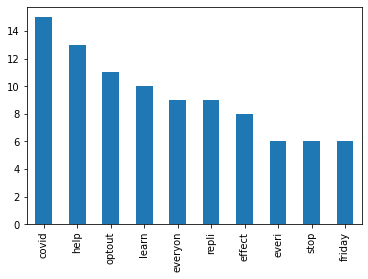

In [ ]:

allItems = []
for i in itemsets_df['itemsets']:
    for j in i:
        allItems.append(j)
        
bar_df = pd.DataFrame(allItems, columns=['Items'])
print(bar_df['Items'].value_counts().head(10))
bar_df['Items'].value_counts().head(10).plot.bar()

In [ ]:
df

,a,aa,aackeri,aacvpr,aadncinfopubsaandccanadaca,aadubyk,aafccanada,aagotii,aaimcloud,aaip,...,zuzubear,zxatun,zxthix,zygmunt,zymeerjemison,zytec,zzellera,zzhennan,zzulfiali,zzz
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65558,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
65559,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
65560,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
65561,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


    Confidence  Number of rules
0          0.0              142
1          0.1              142
2          0.2              142
3          0.3              140
4          0.4              129
5          0.5              101
6          0.6               80
7          0.7               69
8          0.8               55
9          0.9               46
10         1.0                7


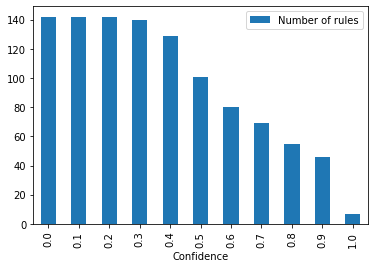

In [ ]:
frequent_itemsets2 = apriori(df, min_support=0.125, use_colnames=True)
frequent_itemsets2

confidence = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
number_of_rules = []

for i in confidence:
    a = association_rules(frequent_itemsets2, metric="confidence", min_threshold=i)
    number_of_rules.append(len(a))

data = {'Confidence': confidence, 'Number of rules': number_of_rules}
df2 = pd.DataFrame(data=data)
print(df2)
plot = df2.plot.bar(x='Confidence', y='Number of rules')

In [ ]:
association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.5)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(learn),(covid),0.226805,0.423059,0.194988,0.859718,2.032147,0.099036,4.112712
1,(lt),(covid),0.169852,0.423059,0.169654,0.998833,2.360979,0.097796,494.216762
2,(repli),(covid),0.341443,0.423059,0.193249,0.565979,1.337825,0.048799,1.329293
3,(covid),(vaccin),0.423059,0.304135,0.275735,0.651765,2.143012,0.147068,1.998262
4,(vaccin),(covid),0.304135,0.423059,0.275735,0.906620,2.143012,0.147068,6.178415
...,...,...,...,...,...,...,...,...,...
96,"(covid, repli)","(stop, vaccin)",0.193249,0.175770,0.174519,0.903078,5.137844,0.140552,8.504068
97,"(covid, vaccin)","(stop, repli)",0.275735,0.224929,0.174519,0.632924,2.813887,0.112498,2.111474
98,"(repli, vaccin)","(stop, covid)",0.178470,0.178805,0.174519,0.977865,5.468888,0.142608,37.099619
99,(repli),"(stop, covid, vaccin)",0.341443,0.175709,0.174519,0.511123,2.908920,0.114525,1.686091


#ARM (Rules)

In [ ]:
matrix_df = pd.DataFrame(columns=['Threshold Support', 'Threshold Confidence', 'Count of rules'])
for min_support_initialize in np.arange(0.1, 0.5, 0.0625): #0.125, 0.5, 0.0625
  for min_threshold_initialize in np.arange(0.5, 1, 0.1):
    frequent_itemsets_temp = apriori(df, min_support=min_support_initialize, use_colnames=True)
    if(frequent_itemsets_temp.empty):
      continue
    rules = association_rules(frequent_itemsets_temp, metric="confidence", min_threshold=min_threshold_initialize)
  # rules = rules.sort_values(by='confidence', ascending =False)
  # print(rules)
    matrix_df.loc[len(matrix_df.index)] = [min_support_initialize, min_threshold_initialize, len(rules.index)] 
  
print(matrix_df)

    Threshold Support  Threshold Confidence  Count of rules
0              0.1000                   0.5          1705.0
1              0.1000                   0.6          1590.0
2              0.1000                   0.7          1316.0
3              0.1000                   0.8          1057.0
4              0.1000                   0.9           986.0
5              0.1625                   0.5            89.0
6              0.1625                   0.6            68.0
7              0.1625                   0.7            57.0
8              0.1625                   0.8            47.0
9              0.1625                   0.9            41.0
10             0.2250                   0.5             6.0
11             0.2250                   0.6             6.0
12             0.2250                   0.7             3.0
13             0.2250                   0.8             3.0
14             0.2250                   0.9             1.0
15             0.2875                   

In [ ]:
matrix_df.to_csv('Support vs Confidence for public health agencies.csv')

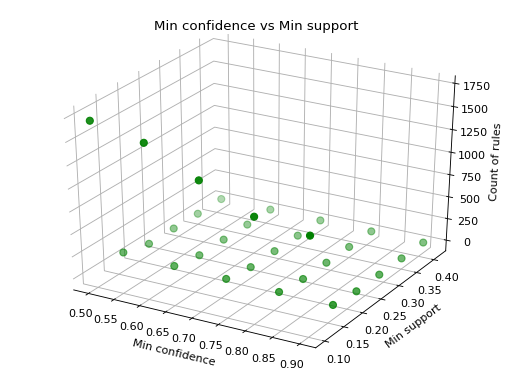

In [ ]:
from IPython.core.pylabtools import figsize
# importing mplot3d toolkits, numpy and matplotlib
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import itertools
fig = plt.figure(figsize=(8, 6), dpi=80)

# syntax for 3-D projection
ax = plt.axes(projection ='3d', )

# defining all 3 axes
z = matrix_df['Count of rules']
x = matrix_df['Threshold Confidence']
y = matrix_df['Threshold Support']

# plotting

ax.scatter(x, y, z, color='green', s=40)
ax.set_title('Min confidence vs Min support')
ax.set_xlabel('Min confidence')
ax.set_ylabel('Min support')

# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

# ax.grid(False)

ax.set_zlabel('Count of rules')
plt.show()


In [ ]:
# 0              0.1250                   0.5           101.0

# 3              0.1000                   0.8          1057.0
frequent_itemsets_temp = apriori(df, min_support=0.1, use_colnames=True)

rules = association_rules(frequent_itemsets_temp, metric="confidence", min_threshold=0.8)
rules[rules['lift']>=1]
print(rules)

           antecedents                            consequents  \
0                (get)                                (covid)   
1              (learn)                                (covid)   
2                 (lt)                                (covid)   
3            (protect)                                (covid)   
4             (vaccin)                                (covid)   
...                ...                                    ...   
1052       (lt, repli)   (learn, vaccin, optout, stop, covid)   
1053      (lt, optout)    (learn, repli, vaccin, stop, covid)   
1054        (lt, stop)  (learn, repli, vaccin, optout, covid)   
1055  (optout, vaccin)        (learn, repli, lt, stop, covid)   
1056   (optout, covid)       (learn, repli, lt, vaccin, stop)   

      antecedent support  consequent support   support  confidence      lift  \
0               0.190412            0.423059  0.154432    0.811038  1.917082   
1               0.226805            0.423059  0.194988    0

In [ ]:
type(rules)

pandas.core.frame.DataFrame

In [ ]:
df1 = (rules.explode('antecedents')
         .reset_index(drop=True)
         .explode('consequents')
         .reset_index(drop=True))
df1.to_csv('public health agencies rules.csv')

#Bokeh plot

In [ ]:
import pandas as pd
import networkx
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!pip install bokeh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bokeh.io import output_notebook, show, save

In [ ]:
got_df = pd.read_csv('/content/public health agencies rules.csv')

In [ ]:
G = networkx.from_pandas_edgelist(got_df, 'antecedents', 'consequents')

In [ ]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx

In [ ]:
#Choose a title!
title = 'Bokeh plot for public health agencies'

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [("Character", "@index")]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

#Create a network graph object with spring layout
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
network_graph = from_networkx(G, networkx.spring_layout, scale=10, center=(0, 0))

#Set node size and color
network_graph.node_renderer.glyph = Circle(size=15, fill_color='skyblue')

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

#Add network graph to the plot
plot.renderers.append(network_graph)

show(plot)


In [ ]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine, EdgesAndLinkedNodes, NodesAndLinkedEdges, LabelSet
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8
from bokeh.transform import linear_cmap
from networkx.algorithms import community

In [ ]:
degrees = dict(networkx.degree(G))
networkx.set_node_attributes(G, name='degree', values=degrees)
number_to_adjust_by = 5
adjusted_node_size = dict([(node, degree+number_to_adjust_by) for node, degree in networkx.degree(G)])
networkx.set_node_attributes(G, name='adjusted_node_size', values=adjusted_node_size)

In [ ]:
communities = community.greedy_modularity_communities(G)

# Create empty dictionaries
modularity_class = {}
modularity_color = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number and a distinct color
    for name in community: 
        modularity_class[name] = community_number
        modularity_color[name] = Spectral8[community_number]

#Choose colors for node and edge highlighting
node_highlight_color = 'white'
edge_highlight_color = 'black'

#Choose attributes from G network to size and color by — setting manual size (e.g. 10) or color (e.g. 'skyblue') also allowed
size_by_this_attribute = 'adjusted_node_size'
color_by_this_attribute = 'modularity_color'

#Pick a color palette — Blues8, Reds8, Purples8, Oranges8, Viridis8
color_palette = Blues8



#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [
       ("Character", "@index"),
        ("Degree", "@degree"),
         ("Modularity Class", "@modularity_class"),
        ("Modularity Color", "$color[swatch]:modularity_color"),
]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

#Create a network graph object
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
network_graph = from_networkx(G, networkx.spring_layout, scale=10, center=(0, 0))

#Set node sizes and colors according to node degree (color as category from attribute)
network_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, fill_color=color_by_this_attribute)
#Set node highlight colors
network_graph.node_renderer.hover_glyph = Circle(size=size_by_this_attribute, fill_color=node_highlight_color, line_width=2)
network_graph.node_renderer.selection_glyph = Circle(size=size_by_this_attribute, fill_color=node_highlight_color, line_width=2)

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.3, line_width=1)
#Set edge highlight colors
network_graph.edge_renderer.selection_glyph = MultiLine(line_color=edge_highlight_color, line_width=2)
network_graph.edge_renderer.hover_glyph = MultiLine(line_color=edge_highlight_color, line_width=2)

#Highlight nodes and edges
network_graph.selection_policy = NodesAndLinkedEdges()
network_graph.inspection_policy = NodesAndLinkedEdges()

plot.renderers.append(network_graph)

#Add Labels
x, y = zip(*network_graph.layout_provider.graph_layout.values())
node_labels = list(G.nodes())
source = ColumnDataSource({'x': x, 'y': y, 'name': [node_labels[i] for i in range(len(x))]})
labels = LabelSet(x='x', y='y', text='name', source=source, background_fill_color='white', text_font_size='10px', background_fill_alpha=.7)
plot.renderers.append(labels)

show(plot)
#save(plot, filename=f"{title}.html")



In [ ]:
save(plot, filename=f"{title}.html")

'/content/Bokeh plot for public health agencies.html'

#Followers (Maybe not)

In [ ]:
# !pip install -U -qq tweepy

In [ ]:
import tweepy

In [ ]:
# Initialize bearer token and client
bearer_token = "AAAAAAAAAAAAAAAAAAAAAD2hVAEAAAAAjBhkrfvf%2BEftzMPhDJt1oXHLCh4%3D0J5mIvBgW81rnqoNcUXOFMOCqv83ANsZZoELvCvxAYiYnUm4Ql"
client = tweepy.Client(bearer_token=bearer_token)

AttributeError: ignored

In [ ]:
def getUserInfo(client,username):
    user = client.get_user(username=username,user_fields='public_metrics')
    return user


d =getUserInfo(client,'pfizer')

d.data.public_metrics['followers_count']

In [ ]:
client.get_users_followers(id=56488059, max_results=100)

In [ ]:
def getTargetFollowers(n=100, m=150):
  screen_name = 'JoeBiden'
  target_followers = list()
  n = m
  f = tweepy.Cursor(api.get_followers(), screen_name).items(n)
  for fol in f:
    if not fol.protected:
      target_followers.append(fol.screen_name)
    if len(target_followers) == n:
      break
  print(len(target_followers))
  dff = pd.DataFrame(columns=target_followers)
  print(dff.shape)
  return(dff)

#Metrics
Recommender systems can also profit from the messages shared on social media 

The higher the popularity of a tweet, the more likely it is to contain higly supported association rule.




In [ ]:
Sample_Tweets['Tweet_rank'] = Sample_Tweets['like_count']+Sample_Tweets['quote_count']+Sample_Tweets['reply_count']+Sample_Tweets['retweet_count']

In [ ]:
Sample_Tweets = Sample_Tweets.sort_values(by=['Tweet_rank'], ascending=False)


In [ ]:
Sample_Tweets["tokenized_tweet"] = Sample_Tweets["tweet"].progress_apply(lambda x : clean_tweets(x, stopwords_df))


  0%|          | 0/65563 [00:00<?, ?it/s]

In [ ]:
Sample_Tweets

,id,created_at,conversation_id,tweet,retweet_count,like_count,reply_count,quote_count,expanded_url,language,possibly_sensitive,in_reply_to_user_id,username,tokenized_tweet,Tweet_rank
3040,1392911350058323973,2021-05-13 18:35:19+00:00,1392911350058323973,UPDATE: If you are fully vaccinated against #C...,23551,51294,10783,27363,https://bit.ly/3btJaFU,en,False,NaN,CDCgov,"[updat, fulli, vaccin, covid, resum, activ, wi...",112991
7998,1429802487045832707,2021-08-23 13:47:32+00:00,1429802487045832707,"RT @US_FDA: Today, FDA approved the first COVI...",53240,0,0,0,NaN,en,False,NaN,IHSgov,"[rt, usfda, today, fda, approv, first, covid, ...",53240
6840,1246243351503962113,2020-04-04 01:09:03+00:00,1246243351503962113,#DYK? CDC’s recommendation on wearing a cloth ...,13288,21583,2707,4080,https://bit.ly/2Ravt42,en,False,NaN,CDCgov,"[dyk, cdc, recommend, wear, cloth, face, cover...",41658
2473,1420104200957038594,2021-07-27 19:30:00+00:00,1420104200957038594,#DeltaVariant surging in U.S. New data show De...,12222,15996,8985,3666,http://www.cdc.gov/coronavirus,en,False,NaN,CDCgov,"[deltavari, surg, us, new, data, show, delta, ...",40869
7111,1232431332220784640,2020-02-25 22:25:01+00:00,1232431332220784640,There is currently no reported community sprea...,7257,17067,1720,989,http://www.cdc.gov/COVID19,en,False,NaN,CDCgov,"[current, report, commun, spread, covid, us, p...",27033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53061,1322162800706375680,2020-10-30 13:05:50+00:00,1322162800706375680,@MahumFN Remember to follow your local public ...,0,0,0,0,http://ow.ly/S06g30re0Vz,en,False,1.041657e+18,GovCanHealth,"[mahumfn, rememb, follow, local, public, healt...",0
53062,1322162800647614467,2020-10-30 13:05:50+00:00,1322162800647614467,@RunnersMedia Remember to follow your local pu...,0,0,0,0,http://ow.ly/S06g30re0Vz,en,False,8.130053e+17,GovCanHealth,"[runnersmedia, rememb, follow, local, public, ...",0
53063,1322162800467320834,2020-10-30 13:05:50+00:00,1322162800467320834,@cujsoc Remember to follow your local public h...,0,0,0,0,http://ow.ly/S06g30re0Vz,en,False,3.898933e+08,GovCanHealth,"[cujsoc, rememb, follow, local, public, health...",0
53033,1322162859434979333,2020-10-30 13:06:04+00:00,1322162859434979333,@ScrewyTheFurry Remember to follow your local ...,0,0,0,0,http://ow.ly/S06g30re0Vz,en,False,1.030178e+18,GovCanHealth,"[screwythefurri, rememb, follow, local, public...",0


In [ ]:
Sample_Tweets["tokenized_tweet"]

3040     [updat, fulli, vaccin, covid, resum, activ, wi...
7998     [usfda, today, fda, approv, first, covid, vacc...
6840     [dyk, cdc, recommend, wear, cloth, face, cover...
2473     [deltavari, surg, us, new, data, show, delta, ...
7111     [current, report, commun, spread, covid, us, p...
                               ...                        
33518    [citimmcanada, current, vaccin, manufactur, pf...
33519    [citimmcanada, meet, vaccin, criteria, travel,...
33520    [citimmcanada, hi, proof, vaccin, requir, ente...
33522               [markdig, inform, travel, canada, air]
32781    [badcatitagain, even, pandem, noth, bring, peo...
Name: tokenized_tweet, Length: 65563, dtype: object

In [ ]:
type(Sample_Tweets['tokenized_tweet'])

pandas.core.series.Series

In [ ]:
sorted_df = Sample_Tweets['tokenized_tweet']

In [ ]:
sorted_df.to_csv('sorted.csv')

In [ ]:
Sample_Tweets.iloc[0]['tweet']

'UPDATE: If you are fully vaccinated against #COVID19, you can resume activities without wearing a mask or staying 6 feet apart, except where required by federal, state, local, tribal or territorial laws, incl. local business and workplace guidance. More: https://t.co/FJMon7WlFO'

In [ ]:
rules['rank'] = rules['antecedent support']+rules['confidence']+rules['consequent support']+rules['leverage']+rules['lift']+rules['support']+rules['conviction']

In [ ]:
sorted_rules = rules.sort_values(by=['rank'], ascending=False)

In [ ]:
sorted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,rank
987,"(repli, lt, optout, stop, covid)","(learn, vaccin)",0.122066,0.179202,0.122066,1.000000,5.580305,0.100191,inf,inf
558,"(optout, covid, repli, vaccin)",(stop),0.122066,0.363025,0.122066,1.000000,2.754632,0.077753,inf,inf
549,"(lt, stop, covid, vaccin)",(repli),0.122081,0.341443,0.122081,1.000000,2.928750,0.080397,inf,inf
550,"(lt, repli, vaccin)","(stop, covid)",0.122081,0.178805,0.122081,1.000000,5.592681,0.100252,inf,inf
551,"(lt, stop, repli)","(covid, vaccin)",0.122081,0.275735,0.122081,1.000000,3.626673,0.088419,inf,inf
...,...,...,...,...,...,...,...,...,...,...
7,(repli),(optout),0.341443,0.459482,0.288730,0.845618,1.840373,0.131843,3.501170,7.408658
12,(receiv),(repli),0.158870,0.341443,0.128762,0.810484,2.373705,0.074517,3.474941,7.362721
10,(stop),(optout),0.363025,0.459482,0.304562,0.838956,1.825875,0.137759,3.356346,7.286005
0,(get),(covid),0.190412,0.423059,0.154432,0.811038,1.917082,0.073876,3.053215,6.623114


In [ ]:
type(sorted_rules['antecedents'])

pandas.core.series.Series

#Accuracy

Compare sorted_rules['antecedents']+sorted_rules['consequents]' with Sample_tweets['tokenized_tweet'] using iloc

In [ ]:
type(list(sorted_rules.iloc[0]['antecedents']))

list

In [ ]:
count=0
l1 = list(sorted_rules.iloc[0]['antecedents'])
for value in l1:
  if value in sorted_df.iloc[0]:
    count=count+1
l2 = list(sorted_rules.iloc[0]['consequents'])
if(count==len(l1)):
  for value in l2:
    if value in sorted_df.iloc[0]:
      count=count+1
if(count==len(l1)+len(l2)):
  print("exists")
else:
  print("does not exist")

exists


In [ ]:
len(sorted_rules.index)

1057

In [ ]:
len(sorted_df.index)

65563

In [ ]:
sorted_df

3040     [updat, fulli, vaccin, covid, resum, activ, wi...
7998     [rt, usfda, today, fda, approv, first, covid, ...
6840     [dyk, cdc, recommend, wear, cloth, face, cover...
2473     [deltavari, surg, us, new, data, show, delta, ...
7111     [current, report, commun, spread, covid, us, p...
                               ...                        
53061    [mahumfn, rememb, follow, local, public, healt...
53062    [runnersmedia, rememb, follow, local, public, ...
53063    [cujsoc, rememb, follow, local, public, health...
53033    [screwythefurri, rememb, follow, local, public...
32781    [badcatitagain, even, pandem, noth, bring, peo...
Name: tokenized_tweet, Length: 65563, dtype: object

In [ ]:
counter=0

save_df = pd.DataFrame(columns=['Tweet ID (iloc)', 'tweet', 'tokenized', 'Rule No.', 'rule', 'Username'])
# matrix_df.loc[len(matrix_df.index)] = [min_support_initialize, min_threshold_initialize, len(rules.index)] 
for i in range (0, 6556, 1): #data
  for j in range(0, 1057, 1): #rules
    count=0
    l1 = list(sorted_rules.iloc[j]['antecedents'])
    for value in l1:
      if value in sorted_df.iloc[i]:
        count=count+1
    l2 = list(sorted_rules.iloc[j]['consequents'])
    if(count==len(l1)):
      for value in l2:
        if value in sorted_df.iloc[i]:
          count=count+1
    if(count==len(l1)+len(l2)):
      save_df.loc[len(save_df.index)] = [i, Sample_Tweets.iloc[i]['tweet'], Sample_Tweets.iloc[i]["tokenized_tweet"], j, list(sorted_rules.iloc[j]['antecedents'])+list(sorted_rules.iloc[j]['consequents']), Sample_Tweets.iloc[i]['username']]
      # print("Tweet ", i, " contains rule number ", j)
      counter=counter+1 
# for i in range(0, 5, 1):
#   for j in range(0, 75798, 1):
#     count=0
#     l1 = list(sorted_rules.iloc[j]['antecedents'])
#     for value in l1:
#       if value in sorted_df.iloc[i]:
#         count=count+1
#     l2 = list(sorted_rules.iloc[j]['consequents'])
#     if(count==len(l1)):
#       for value in l2:
#         if value in sorted_df.iloc[i]:
#           count=count+1
#     if(count==len(l1)+len(l2)):
#       print(j, " exists at ", i)
#       counter=counter+1
#     else:
#       print("does not exist")

In [ ]:
save_df

,Tweet ID (iloc),tweet,tokenized,Rule No.,rule,Username
0,0,UPDATE: If you are fully vaccinated against #C...,"[updat, fulli, vaccin, covid, resum, activ, wi...",1041,"[vaccin, covid]",CDCgov
1,1,"RT @US_FDA: Today, FDA approved the first COVI...","[rt, usfda, today, fda, approv, first, covid, ...",1041,"[vaccin, covid]",IHSgov
2,2,#DYK? CDC’s recommendation on wearing a cloth ...,"[dyk, cdc, recommend, wear, cloth, face, cover...",1047,"[protect, covid]",CDCgov
3,3,#DeltaVariant surging in U.S. New data show De...,"[deltavari, surg, us, new, data, show, delta, ...",966,"[get, vaccin, covid]",CDCgov
4,3,#DeltaVariant surging in U.S. New data show De...,"[deltavari, surg, us, new, data, show, delta, ...",971,"[covid, get, vaccin]",CDCgov
...,...,...,...,...,...,...
8218,6544,Remember: Mild side effects after getting a #C...,"[rememb, mild, side, effect, get, covid, vacci...",1055,"[get, covid]",CDCgov
8219,6547,What does #COVID19 vaccine distribution look l...,"[covid, vaccin, distribut, look, like, us, lea...",908,"[learn, vaccin, covid]",CDCgov
8220,6547,What does #COVID19 vaccine distribution look l...,"[covid, vaccin, distribut, look, like, us, lea...",1028,"[learn, covid, vaccin]",CDCgov
8221,6547,What does #COVID19 vaccine distribution look l...,"[covid, vaccin, distribut, look, like, us, lea...",1041,"[vaccin, covid]",CDCgov


In [ ]:
counter

8223

In [128]:
save_df.to_csv('final public health agencies.csv')

In [142]:
counter_0to20=0
counter_21to40=0
counter_41to60=0
counter_61to80=0
counter_81to100=0
counter_remaining=0
x=0
i=0
for index, row in save_df.iterrows():
  if(row['Tweet ID (iloc)'])<=1000:
    counter_0to20=counter_0to20+1
  elif(row['Tweet ID (iloc)'])<=2000:
    counter_21to40=counter_21to40+1
  elif(row['Tweet ID (iloc)'])<=3000:
    counter_41to60=counter_41to60+1
  elif(row['Tweet ID (iloc)'])<=4000:
    counter_61to80=counter_61to80+1
  elif(row['Tweet ID (iloc)'])<=5000:
    counter_81to100=counter_81to100+1
  elif(row['Tweet ID (iloc)'])<=6000:
    counter_remaining=counter_remaining+1
  else: 
    x=x+1

In [143]:
print(counter_0to20, " ", counter_21to40, " ", counter_41to60, " ", counter_61to80, " ", counter_81to100)

1721   1719   1480   1223   1002


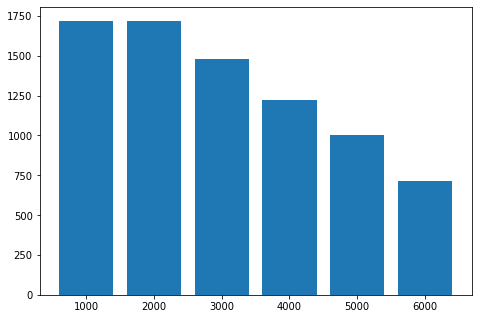

In [145]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
lim = ['1000', '2000', '3000', '4000', '5000', '6000']
val = [counter_0to20,counter_21to40,counter_41to60,counter_61to80,counter_81to100, counter_remaining]
ax.bar(lim,val)
plt.show()